In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/User/Python/ML Course/Class-7/Smoking Data.csv')

In [3]:
df.head()

region  age     sex     bmi  children smoker
0  southwest   19  female  27.900         0    yes
1  southeast   18    male  33.770         1     no
2  southeast   28    male  33.000         3     no
3  northwest   33    male  22.705         0     no
4  northwest   32    male  28.880         0     no

Data anylizing

<AxesSubplot:xlabel='region', ylabel='count'>

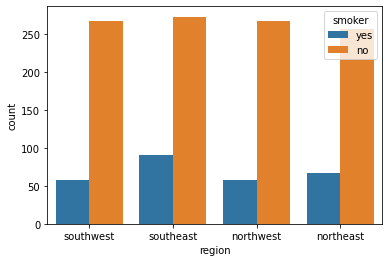

In [4]:
import seaborn as sns

sns.countplot(x = 'region', data = df, hue= 'smoker')

In [5]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
274 / (274 + 1064)#percentage of smokers

0.20478325859491778

Encoding string values

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
col = ['region', 'sex']

for column in col:
    unique = df[column].unique()
    df[column] = OrdinalEncoder(categories=[unique]).fit_transform(df[[column]])

In [9]:
df.head()

region  age  sex     bmi  children smoker
0     0.0   19  0.0  27.900         0    yes
1     1.0   18  1.0  33.770         1     no
2     1.0   28  1.0  33.000         3     no
3     2.0   33  1.0  22.705         0     no
4     2.0   32  1.0  28.880         0     no

In [10]:
x = df.drop('smoker', axis = 1)
y = df.smoker

splitting data for training and testing

In [11]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, train_size= .70, random_state= 42)

Trainig data

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [13]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

Testing data

In [14]:
result = clf.predict(xtest)
result

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'n

In [15]:
import numpy as np
np.array(ytest)

array(['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'ye

Viewing Tree

In [16]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf,
                                feature_names= x.columns, 
                                filled=True, 
                                rounded=True)

graph1 = graphviz.Source(dot_data, format = "png")

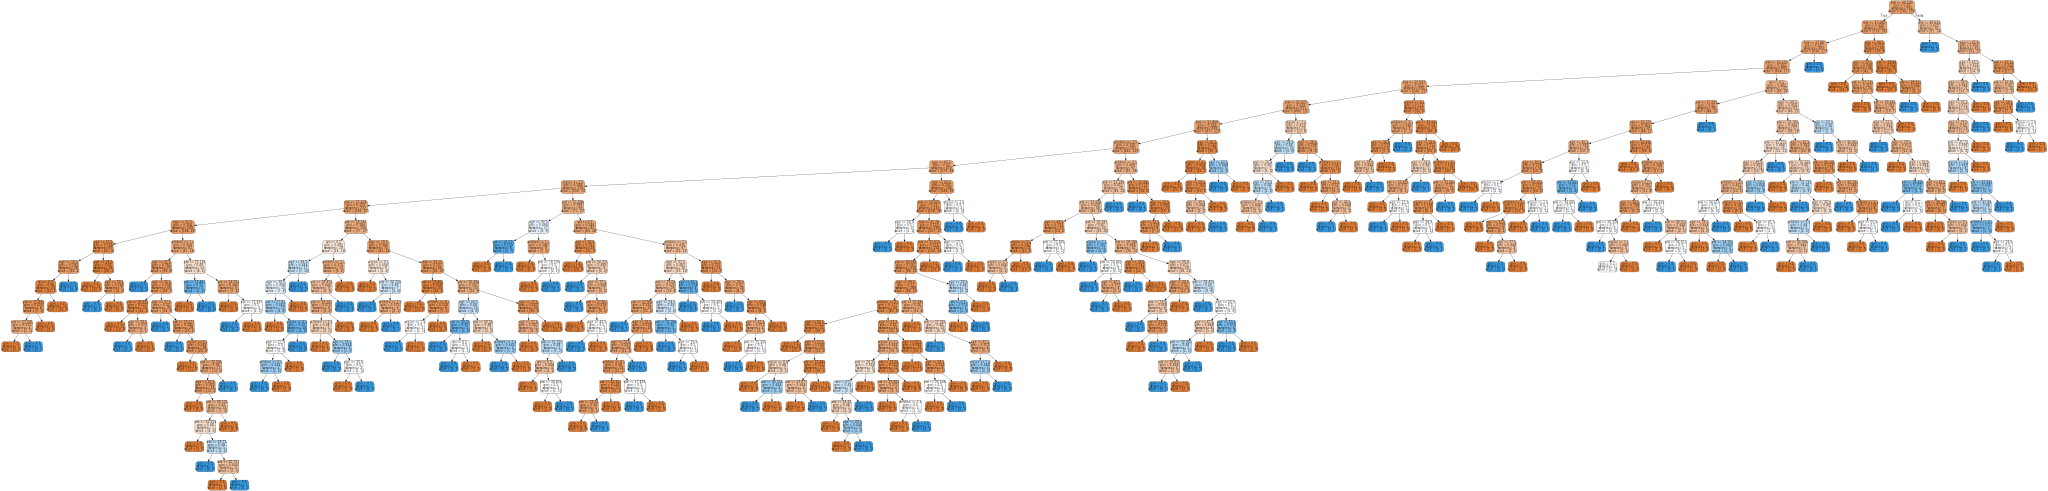

In [17]:
graph1

In [18]:
graph1.render("Smokers")

'Smokers.png'

Model accuracy

In [19]:
clf.score(xtest, ytest)

0.664179104477612

Classification Report

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

In [21]:
print(classification_report(ytest, clf.predict(xtest)))

              precision    recall  f1-score   support

          no       0.81      0.76      0.78       323
         yes       0.21      0.27      0.24        79

    accuracy                           0.66       402
   macro avg       0.51      0.51      0.51       402
weighted avg       0.69      0.66      0.68       402



Confusion Matrix

In [22]:
con_mat = confusion_matrix(ytest, clf.predict(xtest))
con_mat

array([[246,  77],
       [ 58,  21]], dtype=int64)

<AxesSubplot:>

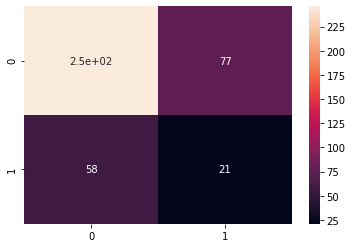

In [23]:
sns.heatmap(con_mat, annot= True)

In [25]:
tp, fn, fp, tn = confusion_matrix(ytest, result).reshape(-1)

Accuracy

In [26]:
(253 + 20) / (253 + 70 + 59 + 20)

0.6791044776119403

In [27]:
(tp + tn) / (tp +tn +fn + fp)

0.664179104477612

Viewing ROC

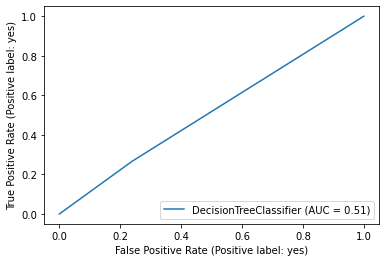

In [28]:
plot_roc_curve(clf, xtest, ytest)

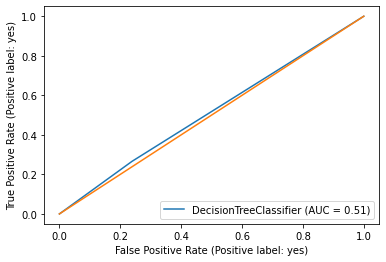

In [29]:
import matplotlib.pyplot as plt

plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1], [0,1])